## SIFT

Mikel Ignacio Barajas Martínez \
Visión Computacional

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### Load Image

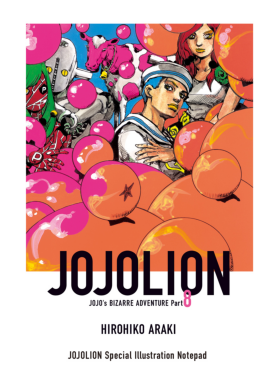

In [2]:
img = cv2.imread('jojolion.jpg', cv2.IMREAD_COLOR)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow('grayscale image', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

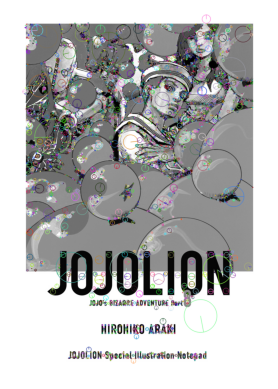

In [4]:
# taken from: https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

# SIFT
 
sift = cv2.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)
 
feature_img = img.copy()
feature_img = cv2.drawKeypoints(gray, kp, feature_img, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT', feature_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('sift_keypoints.jpg', feature_img)

plt.imshow(cv2.cvtColor(feature_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [5]:
# rotate and scale to test SIFT

tranformed_gray = cv2.warpAffine(gray, cv2.getRotationMatrix2D((gray.shape[1]/2, gray.shape[0]/2), 45, 0.5), (gray.shape[1], gray.shape[0]))

cv2.imshow('transformed grayscale image', tranformed_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

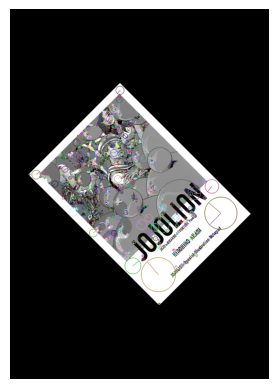

In [6]:
# SIFT on tranformed image
 
kp2, des2 = sift.detectAndCompute(tranformed_gray, None)
 
feature_img2 = img.copy()
feature_img2 = cv2.drawKeypoints(tranformed_gray, kp2, feature_img2, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('SIFT 2', feature_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('sift_keypoints_tranformed.jpg', feature_img2)

plt.imshow(cv2.cvtColor(feature_img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

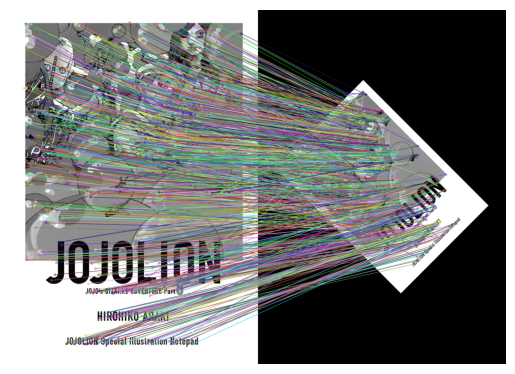

In [7]:
# feature matching, taken from https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des2,k=2)
 
# apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
# cv.drawMatchesKnn expects list of lists as matches.
match_img = cv2.drawMatchesKnn(gray, kp, tranformed_gray, kp2, good, None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
cv2.imshow('Matches', match_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('sift_matches.jpg', match_img)

plt.imshow(match_img)
plt.axis('off')
plt.show()